In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

import models
import payoffs
import plotting
import selection_functions

In [2]:
%matplotlib inline
plt.style.use("ggplot")

# Existence of stable polymorphic equilibria

Sufficient conditions for the existence of stable polymorphic equilibria can be obtained by finding conditions for which all four corner equilibria are unstable.  Borrowing from our previous results we see these conditions are:

\begin{align}
    U'_{GA}(0), U'_{gA}(0) > \frac{P}{S} \\
    U'_{GA}(1), U'_{gA}(1) > \frac{R}{T} \\
\end{align}


## Example: Kirkpatrick Selection

Assume that the selection functions take the functional form from the Kirkpatrick paper.

$$ U(x_A) = \frac{d x_A}{1 + (d-1) x_A} $$

Derivative of this selection function is

$$ U'(x_A) = \frac{d}{\big(1 + (d-1)x_A\big)^2}$$

which yields $U'(0)=d$ and $U'(1)=\frac{1}{d}$. Combining this result with the previous inequalities we have that following sufficient condition for a stable polymorphic attractor.

$$ \frac{P}{S} < d_{GA}, d_{gA} < \frac{T}{R} $$

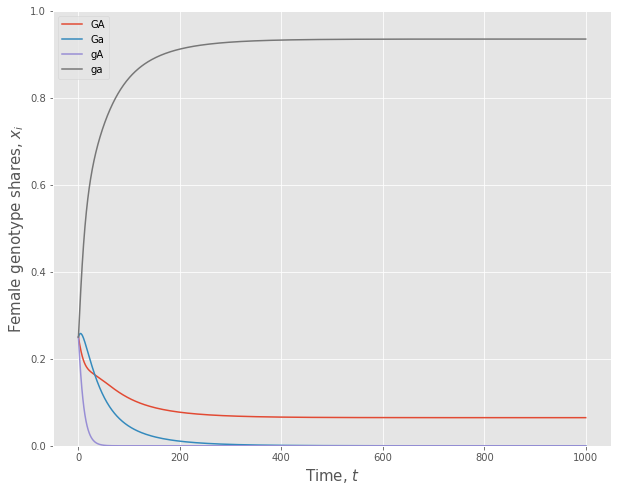

In [8]:
result = plotting.plot_generalized_sexual_selection(x0=0.25, x1=0.25, x2=0.25,
                                                    selection_function="kirkpatrick", d0=1.45, d2=1.1, 
                                                    T=12, R=8, P=5, S=4, mutation_rate=0, max_time=1000)

In [9]:
result

  message: 'The solver successfully reached the interval end.'
     nfev: 2786
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x115383cc0>
   status: 0
  success: True
        t: array([  0.00000000e+00,   1.08172138e-02,   1.18989351e-01,
         8.67176047e-01,   1.63202473e+00,   2.39687340e+00,
         3.16172208e+00,   3.92657076e+00,   4.61477381e+00,
         5.30302079e+00,   5.99126778e+00,   6.67951476e+00,
         7.36776175e+00,   8.05600874e+00,   8.74425572e+00,
         9.43250271e+00,   1.01207497e+01,   1.08089967e+01,
         1.14972437e+01,   1.21854907e+01,   1.28737376e+01,
         1.35619846e+01,   1.42502316e+01,   1.49384786e+01,
         1.56267256e+01,   1.63149726e+01,   1.70032196e+01,
         1.76914665e+01,   1.83797135e+01,   1.90679605e+01,
         1.97562075e+01,   2.04444545e+01,   2.11327015e+01,
         2.18209485e+01,   2.25091954e+01,   2.31974424e+01,
         2.38856894e+01,   2.45739364e+01,   2.5

## Example: Seger Selection

Assume that the selection functions take their functional form from the Seger paper.

$$ U_{GA} = x_A\big(1 + d(1 - x_A)\big) $$

Derivative of this selection function is

$$ U'_{GA} = 1 + d - 2dx_A$$

which yields $U'_{GA}(0)=1 + d$ and $U'_{GA}(1)=1-d$. Combining this result with the previous inequalities we have that following sufficient condition for a stable polymorphic attractor.

$$ \frac{P}{S}-1 < d_{GA}, d_{gA} < 1 - \frac{R}{T}$$

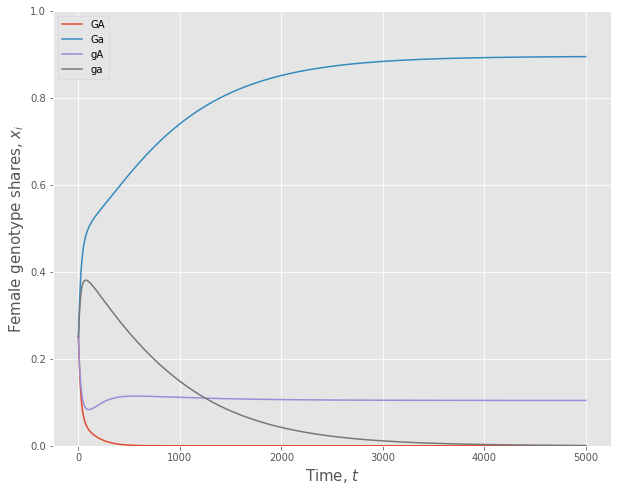

In [6]:
result = plotting.plot_generalized_sexual_selection(x0=0.25, x1=0.25, x2=0.25,
                                                    selection_function="seger", d0=0.275, d2=0.3, 
                                                    T=12, R=8, P=5, S=4, mutation_rate=0, max_time=5000)

In [7]:
result

  message: 'The solver successfully reached the interval end.'
     nfev: 11342
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x115139358>
   status: 0
  success: True
        t: array([  0.00000000e+00,   1.27694389e-02,   1.40463828e-01, ...,
         4.99413058e+03,   4.99726558e+03,   5.00000000e+03])
 t_events: None
        y: array([[  2.50000000e-01,   2.49897717e-01,   2.48876336e-01, ...,
          6.90017978e-21,   6.71054429e-21,   6.54939972e-21],
       [  2.50000000e-01,   2.50105815e-01,   2.51162897e-01, ...,
          8.94940666e-01,   8.94944108e-01,   8.94947098e-01],
       [  2.50000000e-01,   2.49914645e-01,   2.49062149e-01, ...,
          1.04275559e-01,   1.04275405e-01,   1.04275271e-01],
       [  2.50000000e-01,   2.50081824e-01,   2.50898618e-01, ...,
          7.83776020e-04,   7.80487692e-04,   7.77630787e-04]])

# Can you find more examples?

In [10]:
# sliders used to control the initial condition
x0_slider = widgets.FloatSlider(value=0.25, min=0.0, max=1.0, step=0.01, description=r"$x_0$")
x1_slider = widgets.FloatSlider(value=0.25, min=0.0, max=1.0, step=0.01, description=r"$x_1$")
x2_slider = widgets.FloatSlider(value=0.25, min=0.0, max=1.0, step=0.01, description=r"$x_2$")

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=12, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=5, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

# slider used to control which selection function is being used
U_slider = widgets.Dropdown(options=["kirkpatrick", "seger"], index=0, description=r"$U$")

# slider that controls the parameters of the selection function
d0_slider = widgets.FloatSlider(value=1.0, min=0.0, max=10, step=0.01, description=r"$d_0$")
d2_slider = widgets.FloatSlider(value=1.0, min=0.0, max=10, step=0.01, description=r"$d_2$")

# slider used to control the mutation rate
e_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=1e-3, description=r"$\epsilon$", readout_format=".3f")

# slider that controls max simulation time
max_time_slider = widgets.IntSlider(value=1000, min=1, max=5000, description=r"$\max t$")

w = widgets.interactive(plotting.plot_generalized_sexual_selection, x0=x0_slider, x1=x1_slider, x2=x2_slider,
                        selection_function=U_slider, d0=d0_slider, d2=d2_slider, 
                        T=T_slider, R=R_slider, P=P_slider, S=S_slider, 
                        mutation_rate=e_slider, max_time=max_time_slider)
display(w)

A Jupyter Widget